In [1]:
import os.path
import datetime

import numpy  as np
import pandas as pd

In [211]:
# Variables: dirs and files

dirBase   = '..'

dirData   = os.path.join(dirBase,'Data')
dirPicle  = os.path.join(dirBase,'Data','Pickle')
dirTemp   = os.path.join(dirBase,'Temp','Temp','Class3')
dirResult = os.path.join(dirBase,'Result','Leak') 

fileTrain      = os.path.join(dirData,'trainExt.csv')
fileValidation = os.path.join(dirData,'trainExtMin.csv')
fileTest       = os.path.join(dirData,'testExt.csv')

In [198]:
# Constants

chunkSize = 4000000
nClusters = 100
nTop      = 5


In [199]:
# rules field

rule1 = ['user_location_city','orig_destination_distance']
rule2 = ['srch_destination_id','hotel_country','hotel_market']
rule3 = ['srch_destination_id']
rule4 = ['hotel_country']

ruleXtest    = ['cnt','is_booking']
ruleXtrain   = ['hotel_cluster'] + ruleXtest


ruleTrain    = rule1+rule2+ruleXtrain+['dt0y']
ruleTest     = rule1+rule2+ruleXtest+['id']
ruleValidate = ruleTrain

In [5]:
def rule (data,list) :
    df       = data[list].groupby(list).count().reset_index()
    df['nn'] = df.index
    ar       = np.zeros((df.shape[0],nClusters),dtype=np.int16)
    return([df,ar])

In [6]:
# Reader for test data (chunks) on one time if not in disk
print(datetime.datetime.now(),'Read test datas ')
OK =    os.path.exists(os.path.join(dirTemp,'rule1Test0Empty.pkl')) and \
        os.path.exists(os.path.join(dirTemp,'rule2Test0Empty.pkl')) and \
        os.path.exists(os.path.join(dirTemp,'rule3Test0Empty.pkl')) and \
        os.path.exists(os.path.join(dirTemp,'rule4Test0Empty.pkl')) and \
        os.path.exists(os.path.join(dirTemp,'rule1Test1Empty.pkl.npy')) and \
        os.path.exists(os.path.join(dirTemp,'rule2Test1Empty.pkl.npy')) and \
        os.path.exists(os.path.join(dirTemp,'rule3Test1Empty.pkl.npy')) and \
        os.path.exists(os.path.join(dirTemp,'rule4Test1Empty.pkl.npy'))

if not OK :

    readerTest = pd.read_csv(fileTest,chunksize=3000000,usecols=ruleTest);
    i = 0;
    for chunk in readerTest :
        i += 1; print(datetime.datetime.now(),'chunk :',i,chunk.shape)

        rule1Test = rule(chunk,rule1)
        rule2Test = rule(chunk,rule2)
        rule3Test = rule(chunk,rule3)
        rule4Test = rule(chunk,rule4)

    del chunk
    del readerTest
    
    rule1Test[0].to_pickle(os.path.join(dirTemp,'rule1Test0Empty.pkl'))
    rule2Test[0].to_pickle(os.path.join(dirTemp,'rule2Test0Empty.pkl'))
    rule3Test[0].to_pickle(os.path.join(dirTemp,'rule3Test0Empty.pkl'))
    rule4Test[0].to_pickle(os.path.join(dirTemp,'rule4Test0Empty.pkl'))

    np.save(os.path.join(dirTemp,'rule1Test1Empty.pkl.npy'),rule1Test[1])
    np.save(os.path.join(dirTemp,'rule2Test1Empty.pkl.npy'),rule2Test[1])
    np.save(os.path.join(dirTemp,'rule3Test1Empty.pkl.npy'),rule3Test[1])
    np.save(os.path.join(dirTemp,'rule4Test1Empty.pkl.npy'),rule4Test[1])
    
else :
    rule1df = pd.read_pickle(os.path.join(dirTemp,'rule1Test0Empty.pkl'))
    rule2df = pd.read_pickle(os.path.join(dirTemp,'rule2Test0Empty.pkl'))
    rule3df = pd.read_pickle(os.path.join(dirTemp,'rule3Test0Empty.pkl'))
    rule4df = pd.read_pickle(os.path.join(dirTemp,'rule4Test0Empty.pkl'))
    
    rule1ar = np.load(os.path.join(dirTemp,'rule1Test1Empty.pkl.npy'))
    rule2ar = np.load(os.path.join(dirTemp,'rule2Test1Empty.pkl.npy'))
    rule3ar = np.load(os.path.join(dirTemp,'rule3Test1Empty.pkl.npy'))
    rule4ar = np.load(os.path.join(dirTemp,'rule4Test1Empty.pkl.npy'))
    
    rule1Test = [rule1df,rule1ar]
    rule2Test = [rule2df,rule2ar]
    rule3Test = [rule3df,rule3ar]
    rule4Test = [rule4df,rule4ar]
    del rule1df,rule2df,rule3df,rule4df
    del rule1ar,rule2ar,rule3ar,rule4ar
    
    print(rule1Test[1].shape,rule2Test[1].shape,rule3Test[1].shape,rule4Test[1].shape)

print(datetime.datetime.now(),'Done ')    

2016-06-02 12:58:37.266471 Read test datas 
(1385522, 100) (43831, 100) (40718, 100) (206, 100)
2016-06-02 12:58:43.922626 Done 


In [7]:
if (False) :
    import pickle
    ffile = open(os.path.join(dirTemp,'rule2Test.pkl'),'wb')
    pickle.dump(rule2.tolist(),file=ffile)
    ffile.close()

In [8]:
print('rule1 =',type(rule1Test[0]),rule1Test[0].shape,rule1Test[1].shape,'\n',rule1Test[0].head())
print('rule2 =',type(rule2Test[0]),rule2Test[0].shape,rule2Test[1].shape,'\n',rule2Test[0].head())
print('rule3 =',type(rule3Test[0]),rule3Test[0].shape,rule3Test[1].shape,'\n',rule3Test[0].head())
print('rule2 =',type(rule4Test[0]),rule4Test[0].shape,rule4Test[1].shape,'\n',rule4Test[0].head())

rule1 = <class 'pandas.core.frame.DataFrame'> (1385522, 3) (1385522, 100) 
    user_location_city  orig_destination_distance  nn
0                   0                     5.4003   0
1                   0                    12.5756   1
2                   0                    21.7732   2
3                   0                    36.5411   3
4                   0                    37.3479   4
rule2 = <class 'pandas.core.frame.DataFrame'> (43831, 4) (43831, 100) 
    srch_destination_id  hotel_country  hotel_market  nn
0                    3             17          1597   0
1                    4              7           246   1
2                    8             50           416   2
3                    9            150           805   3
4                    9            150          2101   4
rule3 = <class 'pandas.core.frame.DataFrame'> (40718, 2) (40718, 100) 
    srch_destination_id  nn
0                    3   0
1                    4   1
2                    8   2
3                 

In [9]:
iGroup = 0
def ruleApply (group,Arr) :
    global iGroup
    nn = group['nn'].iloc[0]; 
    if (iGroup%50000==0) : 
        print(datetime.datetime.now(),'iGroup =',iGroup,'nn =',nn, 'len(group) = ',group.shape)
    iGroup  += 1
    gr  = group[['hotel_cluster','cnt']].groupby(['hotel_cluster']).sum().reset_index()
    Arr[nn][gr['hotel_cluster']] += gr['cnt']
    return True

In [10]:
# Reader for train data (chunks) if not in files

# ------------------------------------------------------------------------------

print(datetime.datetime.now(),'Read test datas from pickle')

rule1df = pd.read_pickle(os.path.join(dirTemp,'rule1Test0Empty.pkl'))
rule2df = pd.read_pickle(os.path.join(dirTemp,'rule2Test0Empty.pkl'))
rule3df = pd.read_pickle(os.path.join(dirTemp,'rule3Test0Empty.pkl'))
rule4df = pd.read_pickle(os.path.join(dirTemp,'rule4Test0Empty.pkl'))

rule1ar = np.load(os.path.join(dirTemp,'rule1Test1Empty.pkl.npy'))
rule2ar = np.load(os.path.join(dirTemp,'rule2Test1Empty.pkl.npy'))
rule3ar = np.load(os.path.join(dirTemp,'rule3Test1Empty.pkl.npy'))
rule4ar = np.load(os.path.join(dirTemp,'rule4Test1Empty.pkl.npy'))

rule1Test = [rule1df,rule1ar]
rule2Test = [rule2df,rule2ar]
rule3Test = [rule3df,rule3ar]
rule4Test = [rule4df,rule4ar]
del rule1df,rule2df,rule3df,rule4df
del rule1ar,rule2ar,rule3ar,rule4ar
# ------------------------------------------------------------------------------    
print(datetime.datetime.now(),'Read&Work train datas ')
chunkSize = 10000000
#chunkSize = 2000000
#chunkSize = 60000

OK =    os.path.exists(os.path.join(dirTemp,'rule1Test1.pkl.npy')) and \
        os.path.exists(os.path.join(dirTemp,'rule2Test1.pkl.npy')) and \
        os.path.exists(os.path.join(dirTemp,'rule3Test1.pkl.npy')) and \
        os.path.exists(os.path.join(dirTemp,'rule4Test1.pkl.npy'))

if not OK or True:        
    readerTrain = pd.read_csv(fileTrain,chunksize=chunkSize,usecols=ruleTrain);
    readerTrain

    ichunk = -1;
    for chunk in readerTrain :
        ichunk += 1; 
        #if (i>1) : print(datetime.datetime.now(),'break :',i); break;
        print(datetime.datetime.now(),'chunk :',ichunk,chunk.shape)
        
        #
        # app1 = 3+is_booking*17
        # app2 = 1+is_booking*5
        #
        
        # Rule1 --> user_location_city+orig_destination_distance += 1
        print(datetime.datetime.now(),'1'); iGroup = 0;
        grp = chunk[rule1+ruleXtrain].groupby(rule1+['hotel_cluster']).sum().reset_index()
        print(datetime.datetime.now(),'grp=(train group)',grp.shape)
        print(datetime.datetime.now(),'grpx=(test group)',rule1Test[0].shape)
        grp = grp.merge(rule1Test[0],how='inner',on=rule1,copy=False).groupby(rule1)
        print(datetime.datetime.now(),'grp=(new groups)',len(grp));
        grp.apply(ruleApply,rule1Test[1])
        #ruleWork(grp,rule1Test)
        

        # Rule2 --> (year==2014) : srch_destination_id+hotel_country+hotel_market += app1
        print(datetime.datetime.now(),'2'); iGroup = 0;
        grp = chunk.query('dt0y==2014')[rule2+ruleXtrain];
        grp.loc[:,'cnt'] = grp.cnt*(3+17*grp.is_booking)
        grp = grp.groupby(rule2+['hotel_cluster']).sum().reset_index()
        print(datetime.datetime.now(),'grp=(train group)',grp.shape)
        print(datetime.datetime.now(),'grpx=(test group)',rule2Test[0].shape)
        grp = grp.merge(rule2Test[0],how='inner',on=rule2,copy=False).groupby(rule2)
        print(datetime.datetime.now(),'grp=(new groups)',len(grp));
        grp.apply(ruleApply,rule2Test[1])
        #ruleWork(grp,rule2Test,b0Add=3,b1Add=20)
        
        # Rule3 --> srch_destination_id += app1
        print(datetime.datetime.now(),'3'); iGroup = 0;
        grp = chunk[rule3+ruleXtrain]
        grp.loc[:,'cnt'] = grp.cnt*(3+17*grp.is_booking)
        grp = grp.groupby(rule3+['hotel_cluster']).sum().reset_index()
        print(datetime.datetime.now(),'grp=(train group)',grp.shape)
        print(datetime.datetime.now(),'grpx=(test group)',rule3Test[0].shape)
        grp = grp.merge(rule3Test[0],how='inner',on=rule3).groupby(rule3)
        print(datetime.datetime.now(),'grp=(new groups)',len(grp))
        grp.apply(ruleApply,rule3Test[1])
        
        # Rule4 --> hotel_country += app2
        print(datetime.datetime.now(),'4'); iGroup = 0;
        grp = chunk[rule4+ruleXtrain]
        grp.loc[:,'cnt'] = grp.cnt*(1+5*grp.is_booking)
        grp = grp.groupby(rule4+['hotel_cluster']).sum().reset_index()
        print(datetime.datetime.now(),'grp=(train group)',grp.shape)
        print(datetime.datetime.now(),'grpx=(test group)',rule4Test[0].shape)
        grp = grp.merge(rule4Test[0],how='inner',on=rule4).groupby(rule4)
        print(datetime.datetime.now(),'grp=(new groups)',len(grp))
        grp.apply(ruleApply,rule4Test[1])
        
    del readerTrain
    np.save(os.path.join(dirTemp,'rule1Test1.pkl.npy'),rule1Test[1])
    np.save(os.path.join(dirTemp,'rule2Test1.pkl.npy'),rule2Test[1])
    np.save(os.path.join(dirTemp,'rule3Test1.pkl.npy'),rule3Test[1])
    np.save(os.path.join(dirTemp,'rule4Test1.pkl.npy'),rule4Test[1])
    
else :  
    rule1ar = np.load(os.path.join(dirTemp,'rule1Test1.pkl.npy'))
    rule2ar = np.load(os.path.join(dirTemp,'rule2Test1.pkl.npy'))
    rule3ar = np.load(os.path.join(dirTemp,'rule3Test1.pkl.npy'))
    rule4ar = np.load(os.path.join(dirTemp,'rule4Test1.pkl.npy'))
    
    rule1Test[1] = rule1ar
    rule2Test[1] = rule2ar
    rule3Test[1] = rule3ar
    rule4Test[1] = rule4ar
    del rule1ar,rule2ar,rule3ar,rule4ar
    
    print(rule1Test[1].shape,rule2Test[1].shape,rule3Test[1].shape,rule4Test[1].shape)
        
print(datetime.datetime.now(),'Done ')

2016-06-02 12:59:26.980846 Read test datas from pickle
2016-06-02 12:59:27.254172 Read&Work train datas 
2016-06-02 12:59:47.914683 chunk : 0 (10000000, 9)
2016-06-02 12:59:47.914683 1
2016-06-02 12:59:57.088195 grp=(train group) (3336969, 5)
2016-06-02 12:59:57.088195 grpx=(test group) (1385522, 3)
2016-06-02 13:00:06.648669 grp=(new groups) 328717
2016-06-02 13:00:11.476234 iGroup = 0 nn = 8 len(group) =  (1, 6)


C:\Anaconda3-64\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


2016-06-02 13:03:16.133235 iGroup = 50000 nn = 184358 len(group) =  (1, 6)
2016-06-02 13:06:46.239629 iGroup = 100000 nn = 423886 len(group) =  (1, 6)
2016-06-02 13:10:12.196161 iGroup = 150000 nn = 628144 len(group) =  (1, 6)
2016-06-02 13:13:35.278415 iGroup = 200000 nn = 849219 len(group) =  (1, 6)
2016-06-02 13:16:57.786648 iGroup = 250000 nn = 1061586 len(group) =  (1, 6)
2016-06-02 13:20:20.460574 iGroup = 300000 nn = 1249785 len(group) =  (1, 6)
2016-06-02 13:22:18.080663 2
2016-06-02 13:22:25.890171 grp=(train group) (214739, 6)
2016-06-02 13:22:25.890171 grpx=(test group) (43831, 4)
2016-06-02 13:22:26.696841 grp=(new groups) 28092
2016-06-02 13:22:28.302210 iGroup = 0 nn = 0 len(group) =  (2, 7)
2016-06-02 13:24:40.379811 3


C:\Anaconda3-64\lib\site-packages\pandas\core\indexing.py:545: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


2016-06-02 13:24:45.811879 grp=(train group) (251354, 4)
2016-06-02 13:24:45.811879 grpx=(test group) (40718, 2)
2016-06-02 13:24:45.936884 grp=(new groups) 28596
2016-06-02 13:24:46.340164 iGroup = 0 nn = 0 len(group) =  (2, 5)
2016-06-02 13:27:44.744359 4
2016-06-02 13:27:46.951418 grp=(train group) (6637, 4)
2016-06-02 13:27:46.951418 grpx=(test group) (206, 2)
2016-06-02 13:27:46.967037 grp=(new groups) 204
2016-06-02 13:27:46.967037 iGroup = 0 nn = 0 len(group) =  (43, 5)
2016-06-02 13:28:15.444773 chunk : 1 (10000000, 9)
2016-06-02 13:28:15.444773 1
2016-06-02 13:28:25.292941 grp=(train group) (3370737, 5)
2016-06-02 13:28:25.292941 grpx=(test group) (1385522, 3)
2016-06-02 13:28:42.410721 grp=(new groups) 329508
2016-06-02 13:28:47.490875 iGroup = 0 nn = 0 len(group) =  (1, 6)
2016-06-02 13:32:11.173532 iGroup = 50000 nn = 184540 len(group) =  (1, 6)
2016-06-02 13:35:33.391919 iGroup = 100000 nn = 423783 len(group) =  (1, 6)
2016-06-02 13:38:54.525945 iGroup = 150000 nn = 627863

In [ ]:
# Validation on train(is_booking==1) datas

In [112]:
def groupXarr (rule,kkey) : 
    rr  = int(rule[0].get_group(kkey)[[-1]].iloc[0])
    rrr = pd.Series(rule[1][rr]).nlargest(nTop)
    rra = rrr.index.tolist()
    rrb = rrr.tolist()
    return(rra,rrb)


In [ ]:
def groupXarr (rule,kkey) : 
    rr  = int(rule[0].get_group(kkey)[[-1]].iloc[0])
    rrr = pd.Series(rule[1][rr]).nlargest(nTop)
    rra = rrr.index.tolist()
    rrb = rrr.tolist()
    return(rra,rrb)


In [48]:
def findTop (a) :
    b = pd.Series(a); b=np.array(b[b>0].nlargest(nTop).index); 
    b=b+1; b.resize(nTop); b=b-1 
    return(b)

2016-06-03 05:00:36.103954 Build array5 begin
(1385522, 100) (43831, 100) (40718, 100) (206, 100)
2016-06-03 05:37:17.382131 Build array5 end


array([[94, -1, -1, -1, -1],
       [13, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1]], dtype=int64)

In [50]:
# Build and save 5-point arrays for rules
print(datetime.datetime.now(),'Build array5 begin')
rule1Arr5 = np.apply_along_axis(findTop,1,rule1Test[1]); print(rule1Arr5.shape)
rule2Arr5 = np.apply_along_axis(findTop,1,rule2Test[1]); print(rule2Arr5.shape)
rule3Arr5 = np.apply_along_axis(findTop,1,rule3Test[1]); print(rule3Arr5.shape)
rule4Arr5 = np.apply_along_axis(findTop,1,rule4Test[1]); print(rule4Arr5.shape)

np.save(os.path.join(dirTemp,'rule1Test2.pkl.npy'),rule1Arr5)
np.save(os.path.join(dirTemp,'rule2Test2.pkl.npy'),rule2Arr5)
np.save(os.path.join(dirTemp,'rule3Test2.pkl.npy'),rule3Arr5)
np.save(os.path.join(dirTemp,'rule4Test2.pkl.npy'),rule4Arr5)

print(datetime.datetime.now(),'Build array5 end')

2016-06-03 05:45:27.636940 Build array5 begin
(43831, 5)
(40718, 5)
(206, 5)
2016-06-03 05:47:18.501276 Build array5 end


<IPython.core.display.Javascript object>


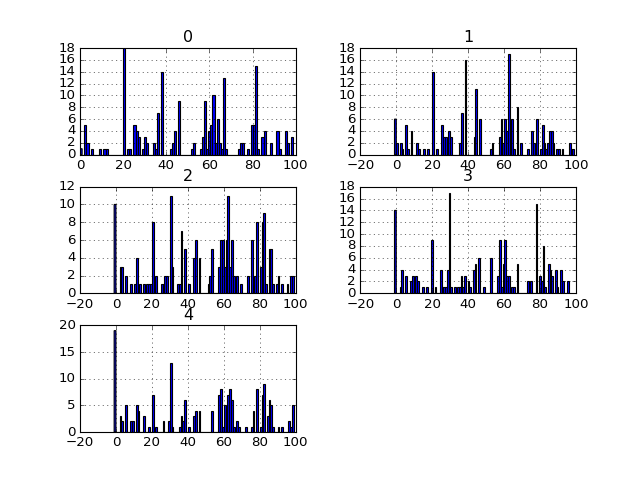

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C51ED39710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002C51EED2160>]], dtype=object)

In [77]:
df=pd.DataFrame(rule4Arr5); df.head();
df.hist(bins=100); 
#len(df[[0]])

In [204]:
rule5Arr5 = np.array([91,42,59,28])

In [186]:
Validation = True
if Validation :        
    print(datetime.datetime.now(),'Validation')
    #readerTrain = pd.read_csv(fileValidation,chunksize=chunkSize);
    readerTrain = pd.read_csv(fileValidation,chunksize=1000000,usecols=ruleValidate);
    #readerTrain
    
    result = 0.0; resultl = []
    nEvent = 0;  
    ichunk = -1
    for chunk in readerTrain :
        ichunk += 1
        irow = -1;
        if (ichunk>3) : print(datetime.datetime.now(),'break'); break
        print(datetime.datetime.now(),'chunk :',ichunk,chunk.shape)
        
        chunk   = chunk.merge(rule1Test[0],how='left',on=rule1,suffixes=["_0","_1"]); #print(chunk.head())
        chunk   = chunk.merge(rule2Test[0],how='left',on=rule2,suffixes=["_1","_2"]); #print(chunk.head())
        chunk   = chunk.merge(rule3Test[0],how='left',on=rule3,suffixes=["_2","_3"]); #print(chunk.head())
        chunk   = chunk.merge(rule4Test[0],how='left',on=rule4,suffixes=["_3","_4"]); #print(chunk.head())
        
        rz  = np.array([-1]*nTop)
        
        rr  = chunk['nn_1'].copy(); rr[chunk.nn_1.isnull()] = 0; rr=rr.astype(int); 
        #print(rr.values[0:5],chunk.nn_1.isnull().tolist()[0:5])
        r1x = rule1Arr5[rr.values];
        r1x[chunk.nn_1.isnull().values] = rz;
        
        rr  = chunk['nn_2'].copy(); rr[chunk.nn_2.isnull()] = 0; rr=rr.astype(int); #print(rr.values[0:5])
        r2x = rule2Arr5[rr.values];
        r2x[chunk.nn_2.isnull().values] = rz;
        
        rr  = chunk['nn_3'].copy(); rr[chunk.nn_3.isnull()] = 0; rr=rr.astype(int); #print(rr.values[0:5])
        r3x = rule3Arr5[rr.values];
        r3x[chunk.nn_3.isnull().values] = rz;
        
        rr  = chunk['nn_4'].copy(); rr[chunk.nn_4.isnull()] = 0; rr=rr.astype(int); #print(rr.values[0:5])
        r4x = rule4Arr5[rr.values];
        r4x[chunk.nn_4.isnull().values] = rz;
        
        '''
        print(r1x[0:5])
        print(r2x[0:5])
        print(r3x[0:5])
        print(r4x[0:5])
        '''
        
        hcl = chunk['hotel_cluster']
        
        for irow in range(chunk.shape[0]):
            #if (irow>25000) : break;
            ra, rb  = [],[]
            nEvent += 1;
            xEvent  = 0;
            
            rr   = r1x[irow].tolist()+r2x[irow].tolist()+r3x[irow].tolist()+r4x[irow].tolist();
            res5 = [i for i in rr if i>-1][0:nTop]
                
            res = 0.0
            if hcl[irow] in res5 : res = 1/(res5.index(hcl[irow])+1)
            result += res
            resultl.append([res,xEvent])
            
            
            #if (nEvent%10000==0) : print(ichunk,irow,result,result/nEvent,hcl[irow],res5) #,ra,rb)
        
    print('----> result = ',result,result/nEvent,len(resultl))
    print(datetime.datetime.now(),'Done')
            
            



2016-06-03 07:43:46.235689 Validation
2016-06-03 07:43:48.312195 chunk : 0 (1000000, 9)
2016-06-03 07:44:50.046209 chunk : 1 (1000000, 9)
2016-06-03 07:45:54.890166 chunk : 2 (1000000, 9)
2016-06-03 07:47:04.936189 chunk : 3 (145036, 9)
----> result =  1073790.6833330088 0.34142397204134034 3145036
2016-06-03 07:47:14.098264 Done


In [53]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


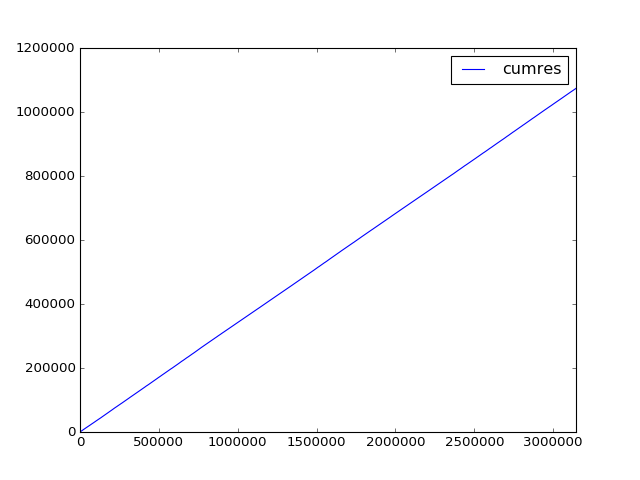

In [195]:
resultl
res=pd.DataFrame(resultl); res.columns=['result','who']; res['cumres']=res['result'].cumsum()
#res['who'].hist()
#res['result'].hist()
#res['cumres'].plot()
res[['cumres']].plot()
#res.shape


In [257]:
Submission = True
if Submission :        
    print(datetime.datetime.now(),'Build result')
    #readerTrain = pd.read_csv(fileValidation,chunksize=chunkSize);
    readerTrain = pd.read_csv(fileTest,chunksize=1000000,usecols=ruleTest);
    #readerTrain
    
    result = []
    id     = []
    nEvent = 0;  
    ichunk = -1
    
    r5x    = rule5Arr5
    
    for chunk in readerTrain :
        ichunk += 1
        irow = -1;
        #if (ichunk>3) : print(datetime.datetime.now(),'break'); break
        print(datetime.datetime.now(),'chunk :',ichunk,chunk.shape)
        
        chunk   = chunk.merge(rule1Test[0],how='left',on=rule1,suffixes=["_0","_1"]); #print(chunk.head())
        chunk   = chunk.merge(rule2Test[0],how='left',on=rule2,suffixes=["_1","_2"]); #print(chunk.head())
        chunk   = chunk.merge(rule3Test[0],how='left',on=rule3,suffixes=["_2","_3"]); #print(chunk.head())
        chunk   = chunk.merge(rule4Test[0],how='left',on=rule4,suffixes=["_3","_4"]); #print(chunk.head())
        
        rz  = np.array([-1]*nTop)
        
        rr  = chunk['nn_1'].copy(); rr[chunk.nn_1.isnull()] = 0; rr=rr.astype(int); 
        #print(rr.values[0:5],chunk.nn_1.isnull().tolist()[0:5])
        r1x = rule1Arr5[rr.values];
        r1x[chunk.nn_1.isnull().values] = rz;
        
        rr  = chunk['nn_2'].copy(); rr[chunk.nn_2.isnull()] = 0; rr=rr.astype(int); #print(rr.values[0:5])
        r2x = rule2Arr5[rr.values];
        r2x[chunk.nn_2.isnull().values] = rz;
        
        rr  = chunk['nn_3'].copy(); rr[chunk.nn_3.isnull()] = 0; rr=rr.astype(int); #print(rr.values[0:5])
        r3x = rule3Arr5[rr.values];
        r3x[chunk.nn_3.isnull().values] = rz;
        
        rr  = chunk['nn_4'].copy(); rr[chunk.nn_4.isnull()] = 0; rr=rr.astype(int); #print(rr.values[0:5])
        r4x = rule4Arr5[rr.values];
        r4x[chunk.nn_4.isnull().values] = rz;
        
        id= id+chunk['id'].tolist()
        
        for irow in range(chunk.shape[0]):
            #if (irow>25000) : break;
            nEvent += 1;
            
            res5 =        [i for i in r1x[irow] if (i>-1)]
            res5 = res5 + [i for i in r2x[irow] if (i>-1) and (i not in res5)]
            res5 = res5 + [i for i in r3x[irow] if (i>-1) and (i not in res5)]
            res5 = res5 + [i for i in r4x[irow] if (i>-1) and (i not in res5)]
            res5 = res5 + [i for i in r5x       if (i>-1) and (i not in res5)]
            
            
                
            result.append(res5[0:nTop])
            
            #if (nEvent%10000==0) : print(ichunk,irow,result,result/nEvent,hcl[irow],res5) #,ra,rb)
        
    result = [x.__str__().replace(',','')[1:-1] for x in result];
    print('----> result = ',id[0:5],result[0:5],len(result))
    print(datetime.datetime.now(),'Done')
    
    
            

2016-06-03 09:31:15.051373 Build result
2016-06-03 09:31:16.957503 chunk : 0 (1000000, 8)
2016-06-03 09:33:12.745432 chunk : 1 (1000000, 8)
2016-06-03 09:35:09.517567 chunk : 2 (528243, 8)
----> result =  [0, 1, 2, 3, 4] ['5 37 55 22 11', '5 38 86 78 61', '91 96 77 59 25', '1 94 34 88 24', '51 50 91 2 59'] 2528243
2016-06-03 09:37:02.624195 Done


In [258]:
testResult = pd.DataFrame({'id':id,'hotel_cluster':result})
fileResult = os.path.join(dirResult,'df-Leak-'+datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')+'.csv'); fileResult

'..\\Result\\Leak\\df-Leak-2016-06-03-09-37-28.csv'

In [259]:
print(testResult[['id','hotel_cluster']].head())
testResult[['hotel_cluster']].to_csv(fileResult,header=True,index_label="id")

   id   hotel_cluster
0   0   5 37 55 22 11
1   1   5 38 86 78 61
2   2  91 96 77 59 25
3   3   1 94 34 88 24
4   4   51 50 91 2 59
